Pandas information
https://pandas.pydata.org/pandas-docs/stable/10min.html

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/users/hannahgrossman/downloads/mbti_1.csv')

In [4]:
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


TYPE of personality, with POSTS

Introverted or Extroverted?

In [6]:
def isExtrovert(input_str):
    if input_str[0] == "I":
        return False
    elif input_str[0] == "E":
        return True
    else:
        raise Exception("Neither I or E found in:" + input_str[0])

since data is coming in as the 4 letter personality type code, we can access the E or the I via indexing at 0

In [ ]:
data["extroverted"] = data["type"].map(isExtrovert)

What percent of the data is introverted vs extroverted?

Text(0.5,1,'Percent Extroverted')

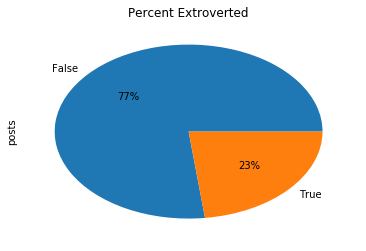

In [11]:
data.groupby("extroverted").count()["posts"].plot.pie(autopct='%1.0f%%')
plt.title("Percent Extroverted")

In [12]:
sample = data[data.extroverted].sample(1999) #to get the number of samples that we want
sample = sample.append(data[~data.extroverted].sample(1999))

In [14]:
sample.groupby("extroverted").count()

,type,posts
extroverted,,
False,1999,1999
True,1999,1999


In [25]:
from nltk.tokenize import wordpunct_tokenize 
import re
from nltk.corpus import stopwords

nltk.tokenize divides a string into substrings
    wordpunct  tokenizes a text into a sequence of alphabetic and non, REGEX
    
    
nltk.corpus STOPWORDS removes stopwords -- boring filler words

In [27]:
stopwords = stopwords.words('english')

In [28]:
sample = sample.reset_index() #reorganizes the data to indexing from0

In [40]:
def tokenize(posts):
    posts = posts.replace("|||", " ") #replace all ||| with " "
    posts = re.sub(r'http\S+', "", posts) #this removes URL's
    posts = posts.lower() #make all lowercase
    posts = wordpunct_tokenize(posts) #splits words, returns in an array
    return [x for x in posts if not x in stopwords] #return words not in stopwords

In [41]:
sample['tokens'] = sample['posts'].map(tokenize)

In [42]:
def getFrequencies(df):
    df = df["tokens"].map(set).map(list) 
    df = df.sum() #concatenate tokens
    return pd.Series(df).value_counts() #valuecounts: how many users used a given word

In [43]:
extro_frequencies = getFrequencies(sample[sample.extroverted])
intro_frequencies = getFrequencies(sample[~sample.extroverted])

extro_frequencies.head(20)

'         1999
.         1998
,         1996
...       1996
like      1985
?         1957
think     1935
people    1924
one       1921
know      1906
:         1888
-         1886
get       1862
would     1856
really    1832
(         1823
time      1814
well      1766
much      1732
!         1711
dtype: int64

In [44]:
frequenices = pd.DataFrame(extro_frequencies, columns=['extrovert_count'])

In [45]:
frequencies = frequenices.join(pd.DataFrame(intro_frequencies, columns=['introvert_count'])).fillna(0)

In [46]:
frequencies = frequencies / 1999 * 100 #to get percentages

In [47]:
#highest difference in percentages
frequencies['difference'] = frequencies['extrovert_count'] - frequencies['introvert_count']

In [48]:
frequencies.sort_values("difference").head(25)

,extrovert_count,introvert_count,difference
infps,14.507254,22.211106,-7.703852
music,27.813907,35.417709,-7.603802
infp,40.920460,48.474237,-7.553777
quiet,11.155578,18.109055,-6.953477
listening,11.255628,18.159080,-6.903452
books,14.907454,20.410205,-5.502751
others,48.424212,53.776888,-5.352676
years,50.675338,56.028014,-5.352676
feeling,43.771886,49.124562,-5.352676
intp,37.118559,42.371186,-5.252626


In [49]:
frequencies.sort_values('difference').tail(15)

,extrovert_count,introvert_count,difference
;),19.509755,12.106053,7.403702
awesome,31.065533,23.411706,7.653827
guy,41.470735,33.666833,7.803902
!!,22.611306,14.057029,8.554277
fun,46.523262,35.867934,10.655328
lol,45.922961,35.067534,10.855428
estp,27.163582,15.357679,11.805903
enfj,31.065533,19.259630,11.805903
guys,47.823912,35.817909,12.006003
ne,31.265633,18.859430,12.406203
